PRACTICAL 06

To implement a Machine Learning Classification model using a Decision Tree Classifier algorithm and enhance the model by K Fold and GridSearchCV cross-validation.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('tennis - tennis.csv')

In [8]:
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [9]:
df.isnull().any()

outlook     False
temp        False
humidity    False
windy       False
play        False
dtype: bool

In [10]:
df.shape

(14, 5)

In [11]:
df.describe()

,outlook,temp,humidity,windy,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,sunny,mild,high,False,yes
freq,5,6,7,8,9


In [12]:
string_to_int= preprocessing.LabelEncoder()                     #encode your data
df=df.apply(string_to_int.fit_transform) #fit and transform it
df

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [13]:
feature_cols = ['outlook', 'temp', 'humidity', 'windy']
X = df[feature_cols]
y = df['play']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [15]:
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [16]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 66.66666666666666


In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1, 0],
       [1, 1]], dtype=int64)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [19]:
data_p=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
data_p

,Actual,Predicted
3,1,0
7,0,0
6,1,1


In [20]:
def model_evaluation(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results = pd.DataFrame([[model_name, acc, prec, rec, f1]], 
                       columns = ["Model", "Accuracy", "Precision", "Recall",
                                 "F1 SCore"])
    results = results.sort_values(["Precision", "Recall"], ascending = False)
    return results
model_evaluation(y_test, y_pred, "KNN")

,Model,Accuracy,Precision,Recall,F1 SCore
0,KNN,0.666667,1.0,0.5,0.666667


In [21]:
features=X.columns
features

Index(['outlook', 'temp', 'humidity', 'windy'], dtype='object')

In [24]:
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from io import StringIO

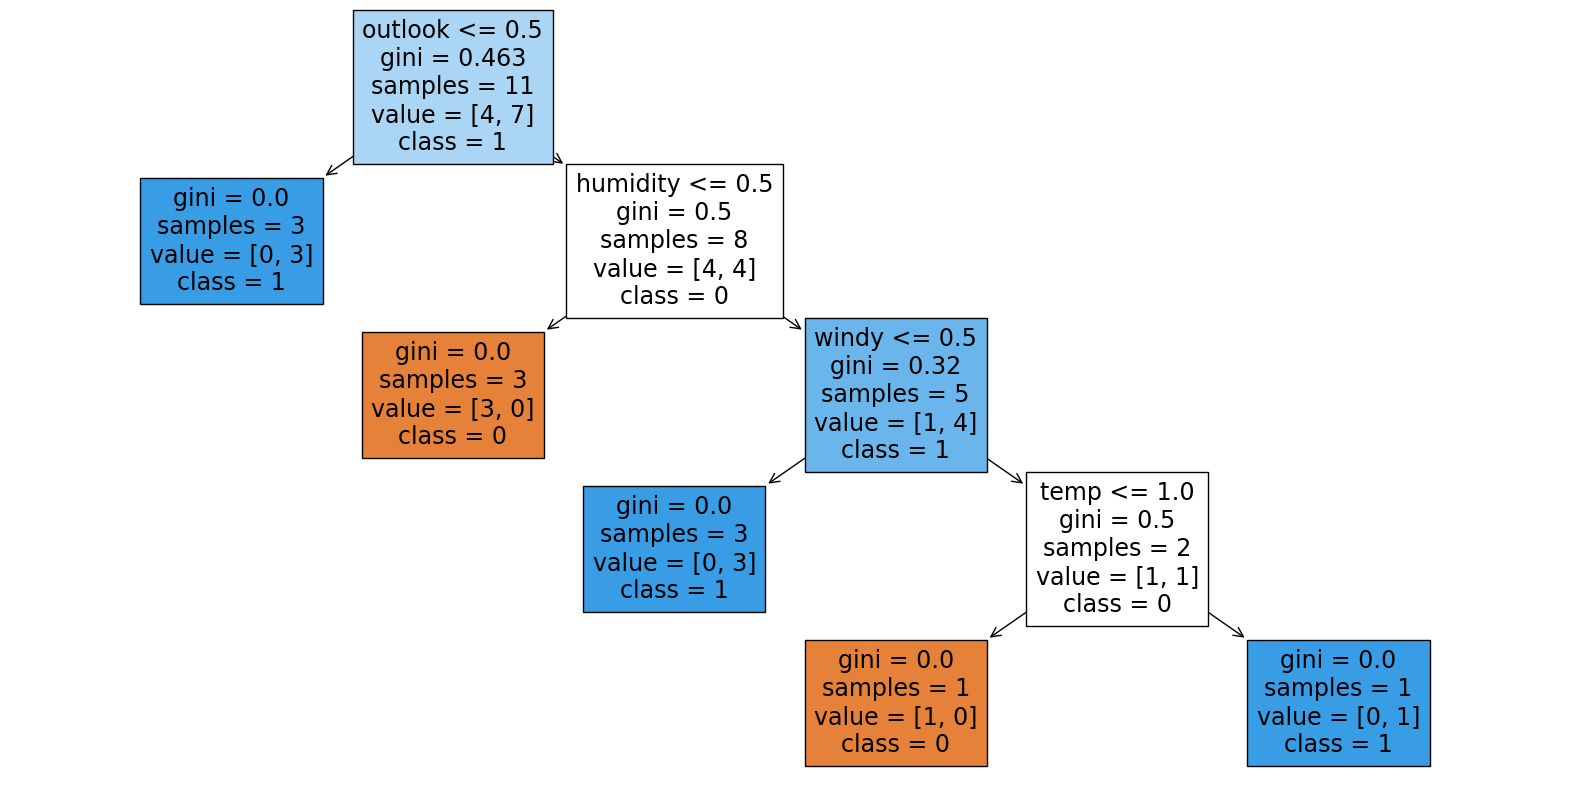

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=features, class_names=['0', '1'])
plt.savefig('diabetes_tree.png')
plt.show()

In [26]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 66.66666666666666


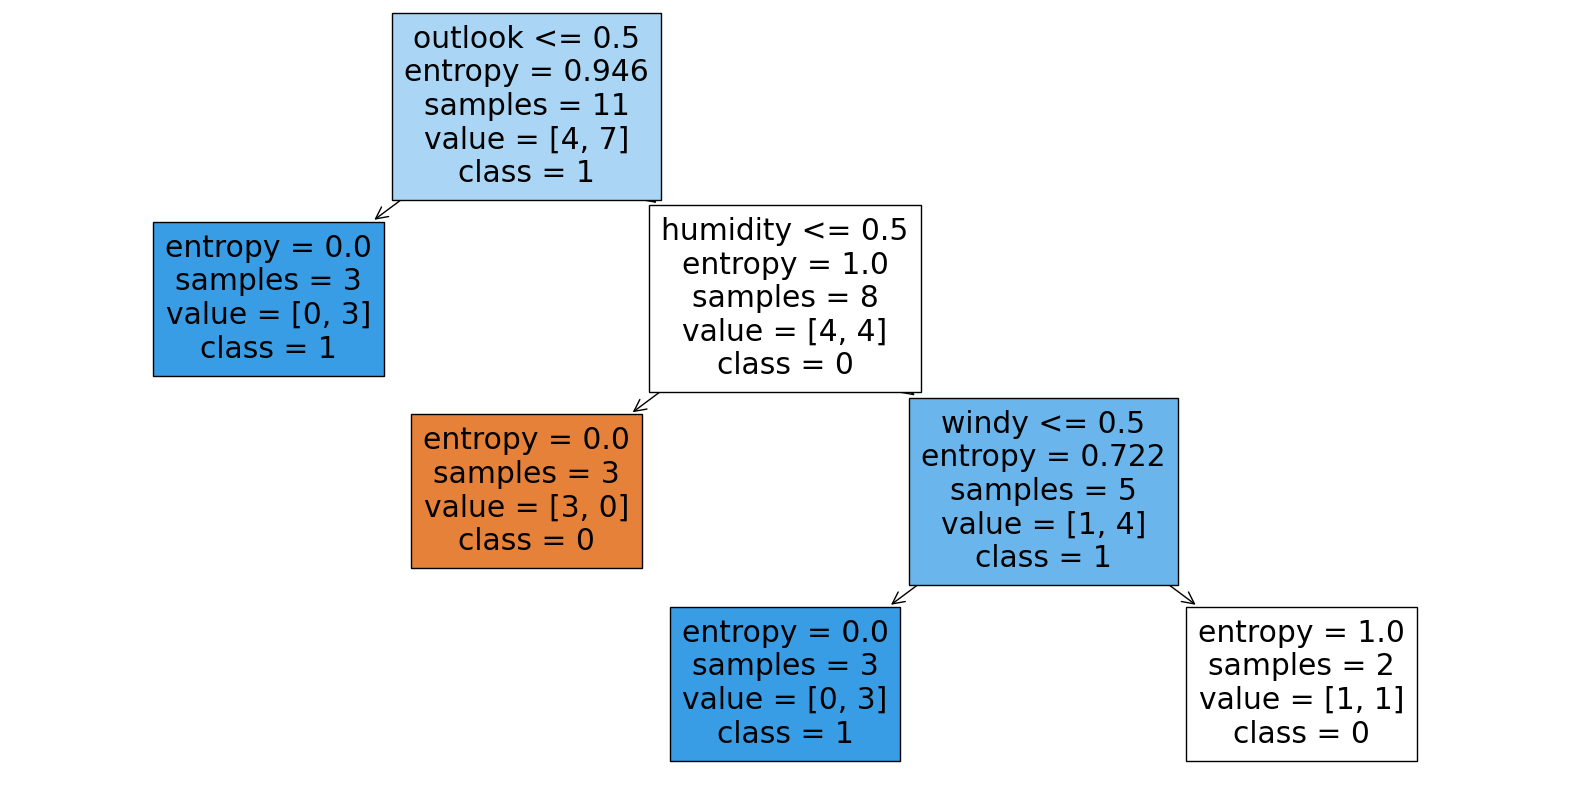

In [27]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=features, class_names=['0', '1'])
plt.savefig('diabetes_tree.png')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_scores = []
test_scores = []
for i in range(1, min(15, len(X_train) - 1)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [29]:
max_test_score =max(test_scores)

In [30]:
test_score_index = [i for i, v in enumerate(test_scores) if v== max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_score_index))))

Max test score 100.0 % and k = [3, 6]


In [31]:
knn = KNeighborsClassifier(11)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.6666666666666666

In [32]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
kf = KFold(n_splits=9, shuffle=True, random_state=42)
train_scores = []
test_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    knn = KNeighborsClassifier(11)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
mean_train_score = np.mean(train_scores)
mean_test_score = np.mean(test_scores)
print('Mean train score:', mean_train_score)
print('Mean test score:', mean_test_score)

Mean train score: 0.6431623931623931
Mean test score: 0.6666666666666666


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
param_grid = {
    'n_neighbors': range(1, 13), 
    'metric': ['manhattan', 'euclidean']
}
model = KNeighborsClassifier()
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X,y)
grid

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': range(1, 13)})

In [34]:
print(grid.best_params_)
print(grid.best_estimator_)

{'metric': 'euclidean', 'n_neighbors': 6}
KNeighborsClassifier(metric='euclidean', n_neighbors=6)
